In [2]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid,load_planar_dataset,load_extra_datasets
%matplotlib inline
np.random.seed(1)

In [3]:
X, Y = load_planar_dataset()

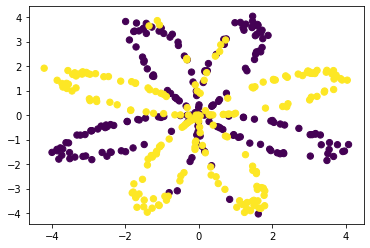

In [12]:
plt.scatter(X[0,:],X[1,:],c=Y, s=40)

In [15]:
linear = sklearn.linear_model.LogisticRegression()
linear.fit(X.T,Y.T)

/home/pratik/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

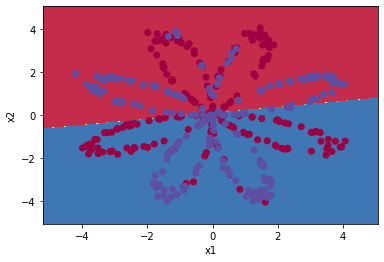

In [23]:
plot_decision_boundary(lambda x: linear.predict(x),X,Y)
# plt.plot(linear.predict(X.T))

In [28]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return(n_x, n_h, n_y)

In [33]:
n_x,n_h,n_y = layer_sizes(X,Y)

In [39]:
def initialize_model_parameter(n_x,n_h,n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
    
    

In [40]:
parameters = initialize_model_parameter(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [49]:
def forward_propogation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1,X) +b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) +b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache
    

In [50]:
A2, cache = forward_propogation(X, parameters)

In [52]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    logprobs = logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    cost = (-1/m) * np.sum(logprobs)
    cost = float(np.squeeze(cost))
    return cost

In [64]:
def backpropogation(parameters, cache, X,Y):
    
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads
    
    

In [65]:
def update(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
    

In [68]:
def nn_model(X,Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
    n_x =layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    
    parameters = initialize_model_parameter(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        A2,cache = forward_propogation(X,parameters)
        cost = compute_cost(A2, Y, parameters)
        grad = backpropogation(parameters,cache, X, Y)
        parameters = update(parameters, grad,learning_rate)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters    

In [92]:
parameters = nn_model(X, Y, 3, 1.02,num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.693114
Cost after iteration 1000: 0.288610
Cost after iteration 2000: 0.275876
Cost after iteration 3000: 0.268976
Cost after iteration 4000: 0.264437
Cost after iteration 5000: 0.261223
Cost after iteration 6000: 0.258840
Cost after iteration 7000: 0.257013
Cost after iteration 8000: 0.255571
Cost after iteration 9000: 0.254408
W1 = [[-10.14570522 -11.79998095]
 [-10.25816751  12.70114949]
 [ -0.04253842  -8.4658547 ]]
b1 = [[-0.12229533]
 [-0.05341423]
 [-0.02756667]]
W2 = [[  6.2718757   -6.17844537 -10.65551655]]
b2 = [[-0.02991993]]


In [93]:
def predict(parameters, X):
    A2, cache = forward_propogation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

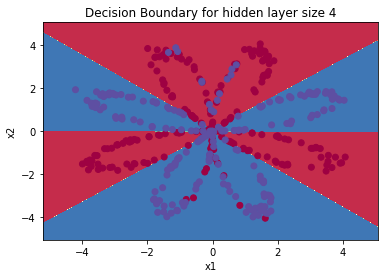

In [94]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))